In [42]:
import matplotlib.pyplot as plt
from IPython.display import display, Image
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import os

In [43]:
os.chdir("..")
from src.SingleDOF import SingleDOFmodel

In [44]:
def CrushForceAB(A, B, L, C):
    # calculate force from crush using A and B
    # A [lb/in]
    # B [lb/in/in]
    # L [in] - crush length
    # C [in] - crush depth
    return L * (A + B * C)

def ABeffK(A1, B1, L1, A2, B2, L2):
    # calcuate effective stiffness [lb/in] based on A and B values for two vehicles
    # determine displacement at no permanent crush
    
    x1 = [0, 20] # displacement in inches
    y1 = [CrushForceAB(A1, B1, L1, x1[0]), CrushForceAB(A1, B1, L1, x1[1])]
    
    x2 = [0, 20] # displacement in inches
    y2 = [CrushForceAB(A2, B2, L2, x2[0]), CrushForceAB(A2, B2, L2, x2[1])]
    
    dx1 = y1[0] * x1[1] / y1[1]
    dx2 = y2[0] * x2[1] / y2[1]

    # effective stiffness
    keff1 = y1[1] / (x1[1] + dx1)
    keff2 = y2[1] / (x2[1] + dx2)
    keff = (keff1 * keff2) / (keff1 + keff2)
    return keff

def formFactor(crush_list_mm):
    # crush_list is a list of 6 crush measurements in mm
    c = crush_list_mm * 0.0393701
    cbar = c
    cbar[0] = cbar[0] / 2
    cbar[5] = cbar[5] / 2
    cbar = np.sum(cbar) / 5
    A = 1 / (15 * cbar**2)
    B = c[0]**2 + c[0]*c[1] + 2*c[1]**2 + c[1]*c[2] + 2*c[2]**2 + c[2]*c[3] + 2*c[3]**2 + \
        c[3]*c[4] + 2*c[4]**2 + c[4]*c[5] + c[5]**2
    return A * B

def formFactorin(crush_list_in):
    # crush_list is a list of 6 crush measurements in mm
    c = crush_list_in
    cbar = c
    cbar[0] = cbar[0] / 2
    cbar[5] = cbar[5] / 2
    cbar = np.sum(cbar) / 5
    A = 1 / (15 * cbar**2)
    B = c[0]**2 + c[0]*c[1] + 2*c[1]**2 + c[1]*c[2] + 2*c[2]**2 + c[2]*c[3] + 2*c[3]**2 + \
        c[3]*c[4] + 2*c[4]**2 + c[4]*c[5] + c[5]**2
    return A * B

def BarrierCrushEnergy(W, s):
    # Crush energy from BEV
    # W [lb] = weight of test vehicle
    # s [mph] = barrier impact speed
    return 0.5 * (W/32.2) * (s*1.46667)**2

def ABeffK(A1, B1, L1, A2, B2, L2):
    # calcuate effective stiffness [lb/in] based on A and B values for two vehicles
    # determine displacement at no permanent crush
    
    x1 = [0, 20] # displacement in inches
    y1 = [CrushForceAB(A1, B1, L1, x1[0]), CrushForceAB(A1, B1, L1, x1[1])]
    
    x2 = [0, 20] # displacement in inches
    y2 = [CrushForceAB(A2, B2, L2, x2[0]), CrushForceAB(A2, B2, L2, x2[1])]
    
    dx1 = y1[0] * x1[1] / y1[1]
    dx2 = y2[0] * x2[1] / y2[1]

    # effective stiffness
    keff1 = y1[1] / (x1[1] + dx1)
    keff2 = y2[1] / (x2[1] + dx2)
    keff = (keff1 * keff2) / (keff1 + keff2)
    return keff

## Single Degree of Freedom Model
### Colinear Front to Rear Impact
- Frontal stiffness based on Pacifica frontal NCAP
- Rear stiffness based on generic rear minivan stiffness Lee (2014)
- Restitution calculated from closing speed using Cirpiani (2002) regression

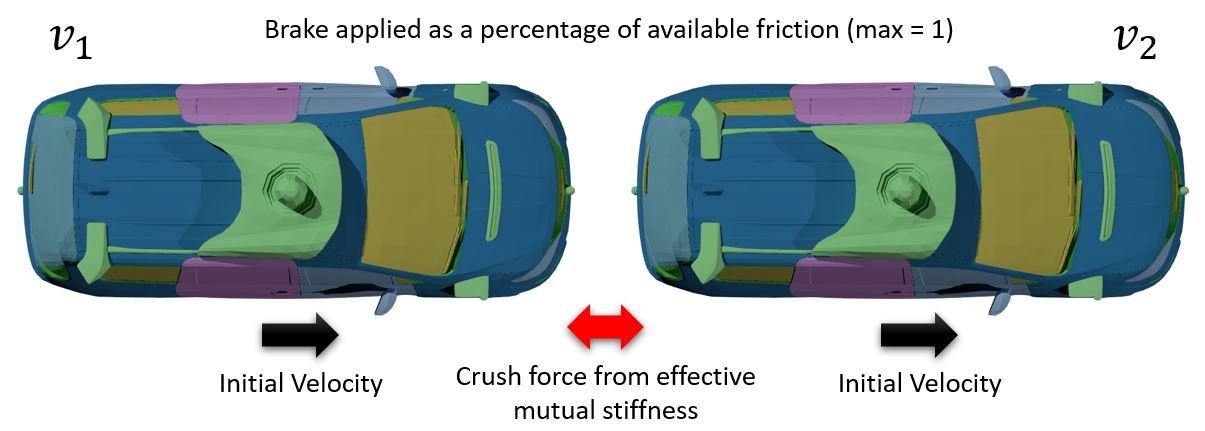

In [45]:
#print('Delta-V from Dissipated Energy (Rose 2005)')
display(Image(filename='D:\OneDrive\Waymo\Reconstruction\\figure1.jpg'))

### Iterative approach similar to Brach (SAE 2003) formulation

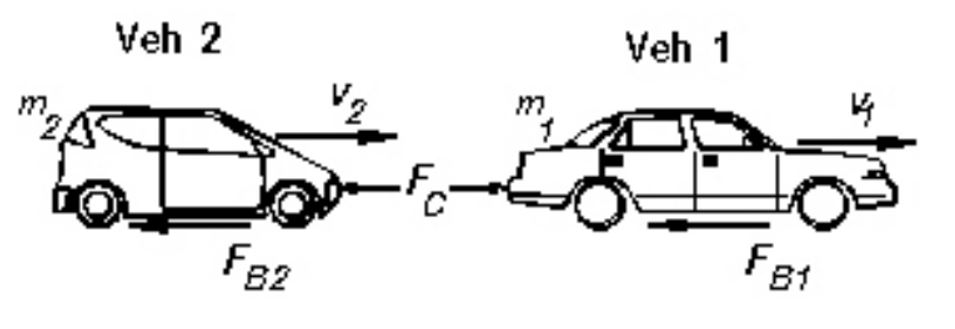

In [46]:
display(Image(filename='D:\OneDrive\Waymo\Reconstruction\\brach.jpg'))

In [47]:
# Pacifica frontal NCAP
# create list of crush values and take average for A and B calculations below
crush_list_mm = np.array([151, 333, 426, 440, 332, 219])
crush_list_ave = crush_list_mm
crush_list_ave[0] = crush_list_ave[0] / 2
crush_list_ave[5] = crush_list_ave[5] / 2

c_ave_in = np.sum(crush_list_ave) / 5 * 0.0393701
c_ave_in

13.503944299999999

In [48]:
W = 4305 # weight [lb]
s = 35 # barrier speed [mph]
L_ft = 4.692 # crush length in ft
L_in = L_ft * 12

bo = 5
b1 = (s-bo) / c_ave_in
b1

2.221573144373826

In [49]:
# A and B values determined from crash plot
x = [0, formFactor(crush_list_mm) * c_ave_in]
y = [np.sqrt(2*formFactor(crush_list_mm)*12*BarrierCrushEnergy(W, bo)/L_in), 
    np.sqrt(2*formFactor(crush_list_mm)*12*BarrierCrushEnergy(W, 35) / L_in)]

# B is the slope**2
B_crashPlot = ((y[1] - y[0]) / x[1])**2

# A is the slope * intercept
A_crashPlot = ((y[1] - y[0]) / x[1]) * y[0]

print(f'A stiffness value from crash plot = {A_crashPlot} lb/in')
print(f'B stiffness value from crash plot = {B_crashPlot} lb/in/in')

A stiffness value from crash plot = 680.8551383032409 lb/in
B stiffness value from crash plot = 280.7966453094213 lb/in/in


In [50]:
# Assign A and B values to both vehicles
# Vehicle 1 - Frontal stiffnes values of Pacifica from crash crash plot
W1 = W
A1 = A_crashPlot
B1 = B_crashPlot
L1 = L_in
C1 = c_ave_in

# Vehicle 2 - Rear stiffness from Lee 
W2 = W
A2 = 347
B2 = 136
L2 = L_in
C2 = c_ave_in

In [51]:
x1 = [0, 20] # displacement in inches
y1 = [CrushForceAB(A1, B1, L1, x1[0]), CrushForceAB(A1, B1, L1, x1[1])]

x2 = [0, 20] # displacement in inches
y2 = [CrushForceAB(A2, B2, L2, x2[0]), CrushForceAB(A2, B2, L2, x2[1])]

In [52]:
# determine displacement at no permanent crush
dx1 = y1[0] * x1[1] / y1[1]
dx2 = y2[0] * x2[1] / y2[1]
# effective stiffness
keff1 = y1[1] / (x1[1] + dx1)
keff2 = y2[1] / (x2[1] + dx1)

keff = ABeffK(A1, B1, L1, A2, B2, L2)

## Pacifica Load Cell Data
### Total Load Barrier Force

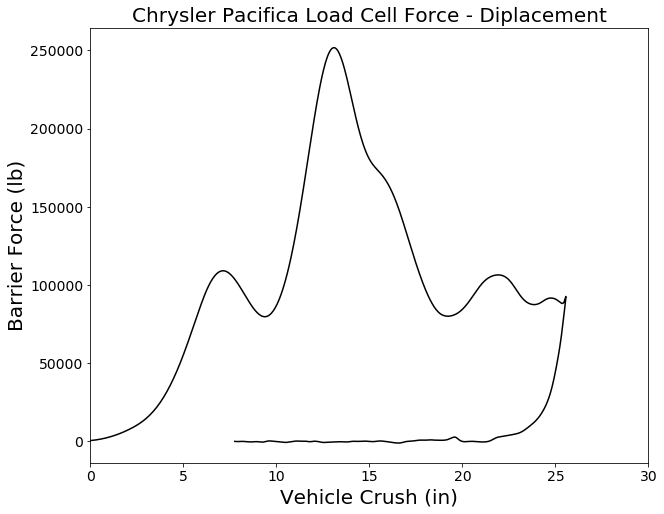

In [53]:
fdx = pd.read_csv('D:\\OneDrive\\Waymo\\Reconstruction\\pacifica_fdx.csv')
fig = plt.figure(figsize = (10,8))
plt.title('Chrysler Pacifica Load Cell Force - Diplacement', fontsize=20)
plt.plot(fdx.disp * 0.0393701, fdx.force * -0.224809, label = 'Pacifica Frontal Stiffnes (NCAP)', color = 'k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0, 30])
plt.xlabel('Vehicle Crush (in)', fontsize=20)
plt.ylabel('Barrier Force (lb)', fontsize=20)
plt.show()

### Effective stiffness based on A and B values
- vertical lines represent displacement needed to intiate permanent crush
- Combined stiffness represents F-dx response of vehicles in contact

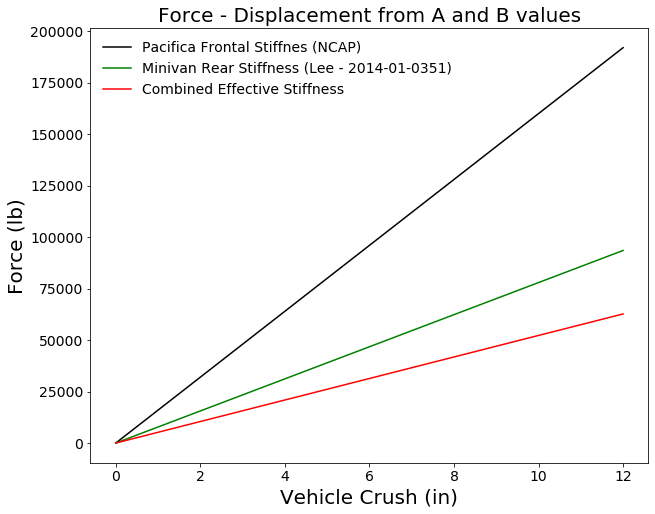

In [54]:
fig = plt.figure(figsize = (10,8))
plt.title('Force - Displacement from A and B values', fontsize=20)
x = [0, 12]
y1 = [0, keff1*x[1]]
y2 = [0, keff2*x[1]]
y3 = [0, keff*x[1]]
plt.plot(x, y1, label = 'Pacifica Frontal Stiffnes (NCAP)', color = 'k')
plt.plot(x, y2, label = 'Minivan Rear Stiffness (Lee - 2014-01-0351)', color = 'g')
plt.plot(x, y3, label = 'Combined Effective Stiffness', color = 'r')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Vehicle Crush (in)', fontsize=20)
plt.ylabel('Force (lb)', fontsize=20)
#plt.grid(which='both', axis='both')
plt.legend(fontsize=14, frameon = False, loc = 2)
#plt.axvline(x=dx1, color='k', linestyle = '--') # vertical line - show displacement needed to initiate permanent crush
#plt.axvline(x=dx2, color='g', linestyle = '--') # vertical line - show displacement needed to initiate permanent crush
plt.show()

In [64]:
####################################  Model Inputs ###########################################
# Assign A and B values to both vehicles
# Vehicle 1 - Frontal stiffnes values of Pacifica from crash crash plot

# these inputs can be fed automatically later
W = 4305 # weight [lb]
L_ft = 4.692 # crush length in ft
L_in = L_ft * 12  

### Vehicle 1 - striking vehicle
W1 = W
A1 = 680.8551383032409
B1 = 280.7966453094213
L1 = L_in                     # length of damage [in]
v1_initial = 5                # [mph] - initial velocity
v1_brake = 0                  # initial brake [% of available friction]

### Vehicle 1 - struck vehicle
W2 = W
A2 = 347
B2 = 136
L2 = L_in                      # length of damage [in]
v2_initial = 0                 # [mph] - initial velocity
v2_brake = 1                   # initial brake [% of available friction]

keff = ABeffK(A1, B1, L1, A2, B2, L2)

dict_in = {"W1":W1, "W2":W2, "keff":keff, "v1_initial":v1_initial, "v2_initial":v2_initial,
           "v1_brake":v1_brake, "v2_brake":v2_brake}

#print(dict_in)

In [56]:
# iterate model 

### Closing Speed of 5 mph
- Varying struck vehicle braking
- No stiking vehicle braking

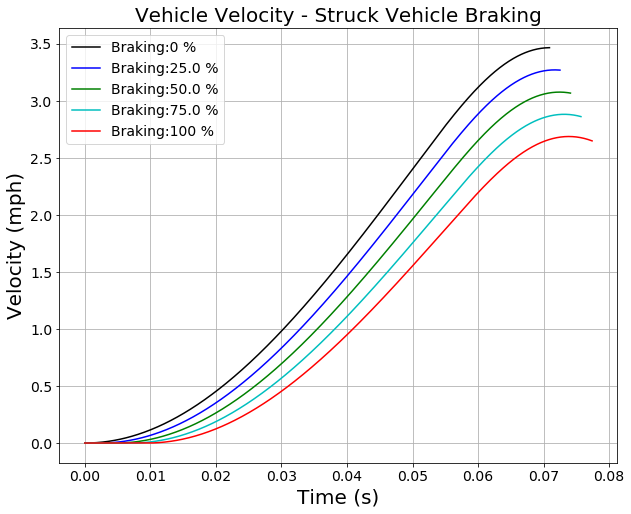

In [5]:
v2_brakeList = [0, 0.25, 0.5, 0.75, 1]
colorList = ['k', 'b', 'g', 'c', 'r']

fig = plt.figure(figsize = (10,8))
plt.title('Vehicle Velocity - Struck Vehicle Braking', fontsize=20)

for j in range(len(v2_brakeList)):

    dict_in = {"W1":W1, "W2":W2, "keff":keff, "v1_initial":v1_initial, "v2_initial":v2_initial,
               "v1_brake":v1_brake, "v2_brake":v2_brakeList[j]}
    
    #print(dict_in)
    spring_model = SingleDOFmodel(dict_in)


    plt.plot(spring_model.t, spring_model.v2 * 0.681818, label = f'Braking:{v2_brakeList[j]*100} %', color = colorList[j])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Time (s)', fontsize=20)
    plt.ylabel('Velocity (mph)', fontsize=20)
    plt.grid(which='both', axis='both')
    plt.legend(fontsize=14)
    
plt.show()

In [63]:
# crate table of data
for j in range(len(v2_brakeList)):

    dict_in = {"W1":W1, "W2":W2, "keff":keff, "v1_initial":v1_initial, "v2_initial":v2_initial,
               "v1_brake":v1_brake, "v2_brake":v2_brakeList[j]}
    
    #print(dict_in)
    spring_model = SingleDOFmodel(dict_in)
    
    if j==0:
        results = pd.DataFrame(dict_in, columns=['W1', 'W2', 'keff', 'v1_initial', 'v2_initial', 'v1_brake', 'v2_brake'], index=[j])
    
    if j > 0:
        new = pd.DataFrame(dict_in, columns=['W1', 'W2', 'keff', 'v1_initial', 'v2_initial', 'v1_brake', 'v2_brake'], index=[j])
        results = results.append(new)
    
    results.loc[j,'v1_Motion'] = max(spring_model.x1) * 12
    results.loc[j,'v2_Motion'] = max(spring_model.x2) * 12

    results.loc[j,'v1_DeltaV'] = (max(spring_model.v1) - min(spring_model.v1)) * 0.681818
    results.loc[j,'v2_DeltaV'] = (max(spring_model.v2) - min(spring_model.v2)) * 0.681818

print('Model Results:')
print()
display(results)

Model Results



,W1,W2,keff,v1_initial,v2_initial,v1_brake,v2_brake,v1_Motion,v2_Motion,v1_DeltaV,v2_DeltaV
0,4305,4305,5223.743093,5,0,0,0.00,4.349463,1.889751,3.464916,3.464916
1,4305,4305,5223.743093,5,0,0,0.25,4.340757,1.794185,3.659528,3.270282
2,4305,4305,5223.743093,5,0,0,0.50,4.327477,1.697149,3.854116,3.075627
3,4305,4305,5223.743093,5,0,0,0.75,4.309592,1.598560,4.048658,2.881003
4,4305,4305,5223.743093,5,0,0,1.00,4.288413,1.503011,4.243178,2.686463


### Closing Speed of 10 mph
- Varying struck vehicle braking
- No stiking vehicle braking

In [70]:
# run with closing speed of 10
v1_initial  = 10

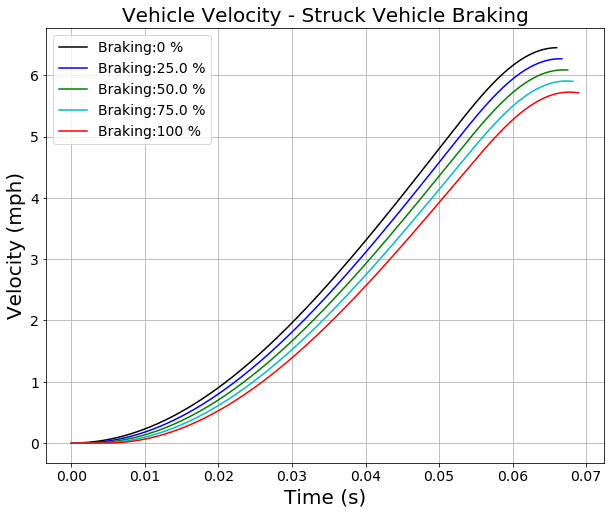

In [71]:
v2_brakeList = [0, 0.25, 0.5, 0.75, 1]
colorList = ['k', 'b', 'g', 'c', 'r']

fig = plt.figure(figsize = (10,8))
plt.title('Vehicle Velocity - Struck Vehicle Braking', fontsize=20)

for j in range(len(v2_brakeList)):

    dict_in = {"W1":W1, "W2":W2, "keff":keff, "v1_initial":v1_initial, "v2_initial":v2_initial,
               "v1_brake":v1_brake, "v2_brake":v2_brakeList[j]}
    
    #print(dict_in)
    spring_model = SingleDOFmodel(dict_in)


    plt.plot(spring_model.t, spring_model.v2 * 0.681818, label = f'Braking:{v2_brakeList[j]*100} %', color = colorList[j])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Time (s)', fontsize=20)
    plt.ylabel('Velocity (mph)', fontsize=20)
    plt.grid(which='both', axis='both')
    plt.legend(fontsize=14)
    
plt.show()

In [72]:
for j in range(len(v2_brakeList)):

    dict_in = {"W1":W1, "W2":W2, "keff":keff, "v1_initial":v1_initial, "v2_initial":v2_initial,
               "v1_brake":v1_brake, "v2_brake":v2_brakeList[j]}
    
    #print(dict_in)
    spring_model = SingleDOFmodel(dict_in)
    
    if j==0:
        results = pd.DataFrame(dict_in, columns=['W1', 'W2', 'keff', 'v1_initial', 'v2_initial', 'v1_brake', 'v2_brake'], index=[j])
    
    if j > 0:
        new = pd.DataFrame(dict_in, columns=['W1', 'W2', 'keff', 'v1_initial', 'v2_initial', 'v1_brake', 'v2_brake'], index=[j])
        results = results.append(new)
    
    results.loc[j,'v1_Motion'] = max(spring_model.x1) * 12
    results.loc[j,'v2_Motion'] = max(spring_model.x2) * 12

    results.loc[j,'v1_DeltaV'] = (max(spring_model.v1) - min(spring_model.v1)) * 0.681818
    results.loc[j,'v2_DeltaV'] = (max(spring_model.v2) - min(spring_model.v2)) * 0.681818

print('Model Results:')
print()
display(results)

Model Results:



,W1,W2,keff,v1_initial,v2_initial,v1_brake,v2_brake,v1_Motion,v2_Motion,v1_DeltaV,v2_DeltaV
0,4305,4305,5223.743093,10,0,0,0.00,8.451835,3.164192,6.450876,6.450876
1,4305,4305,5223.743093,10,0,0,0.25,8.456345,3.072393,6.631961,6.269721
2,4305,4305,5223.743093,10,0,0,0.50,8.464868,2.991405,6.813203,6.088519
3,4305,4305,5223.743093,10,0,0,0.75,8.465853,2.899461,6.994272,5.907308
4,4305,4305,5223.743093,10,0,0,1.00,8.470191,2.817644,7.175493,5.726100


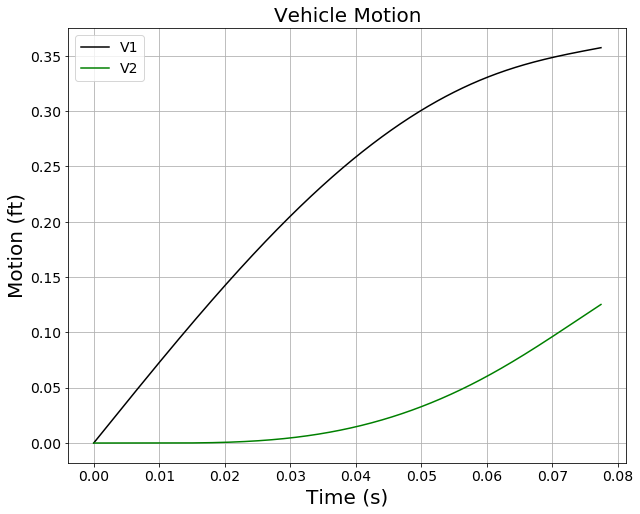

In [59]:
fig = plt.figure(figsize = (10,8))
plt.title('Vehicle Motion', fontsize=20)
plt.plot(spring_model.t, spring_model.x1, label = 'V1', color = 'k')
plt.plot(spring_model.t, spring_model.x2, label = 'V2', color = 'g')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Motion (ft)', fontsize=20)
plt.grid(which='both', axis='both')
plt.legend(fontsize=14)
plt.show()

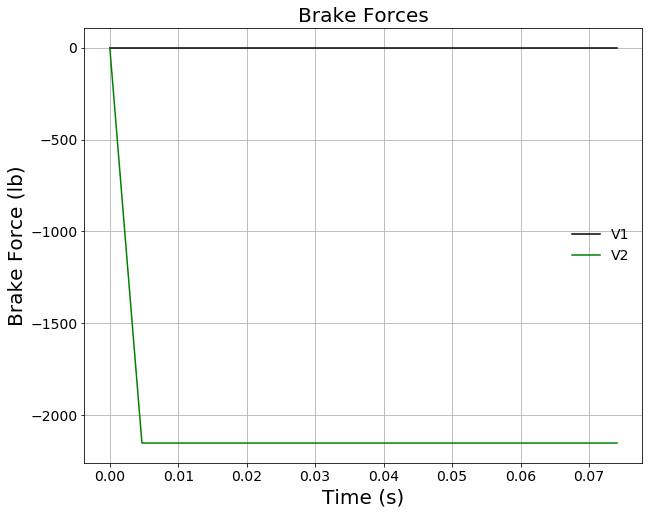

In [9]:
fig = plt.figure(figsize = (10,8))
plt.title('Brake Forces', fontsize=20)
plt.plot(spring_model.t, spring_model.v1_brakeF, label = 'V1', color = 'k')
plt.plot(spring_model.t, spring_model.v2_brakeF, label = 'V2', color = 'g')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Brake Force (lb)', fontsize=20)
plt.grid(which='both', axis='both')
plt.legend(fontsize=14, frameon = False)
plt.show()

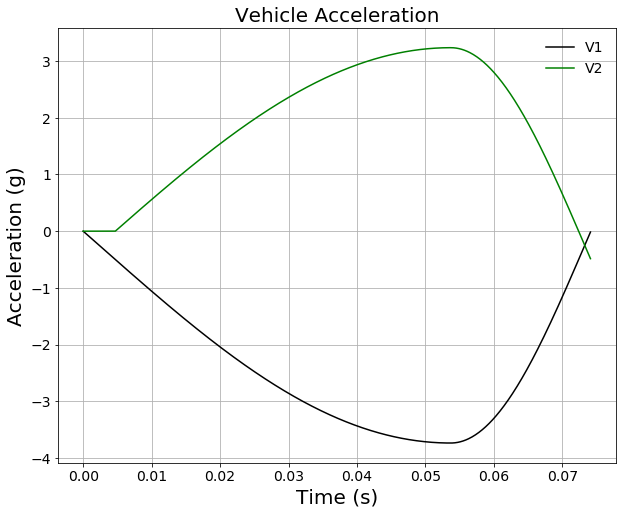

In [10]:
fig = plt.figure(figsize = (10,8))
plt.title('Vehicle Acceleration', fontsize=20)
plt.plot(spring_model.t, spring_model.a1 / 32.2, label = 'V1', color = 'k')
plt.plot(spring_model.t, spring_model.a2 / 32.2, label = 'V2', color = 'g')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Acceleration (g)', fontsize=20)
plt.grid(which='both', axis='both')
plt.legend(fontsize=14, frameon = False)
plt.show()

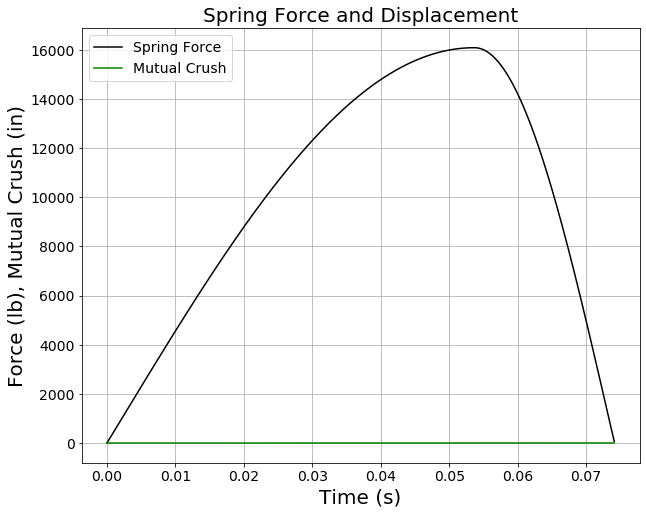

In [23]:
fig = plt.figure(figsize = (10,8))
plt.title('Spring Force and Displacement', fontsize=20)
plt.plot(spring_model.t, spring_model.springF, label = 'Spring Force', color = 'k')
plt.plot(spring_model.t, spring_model.dx * -12, label = 'Mutual Crush', color = 'g')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Force (lb), Mutual Crush (in)', fontsize=20)
plt.grid(which='both', axis='both')
plt.legend(fontsize=14)
plt.show()

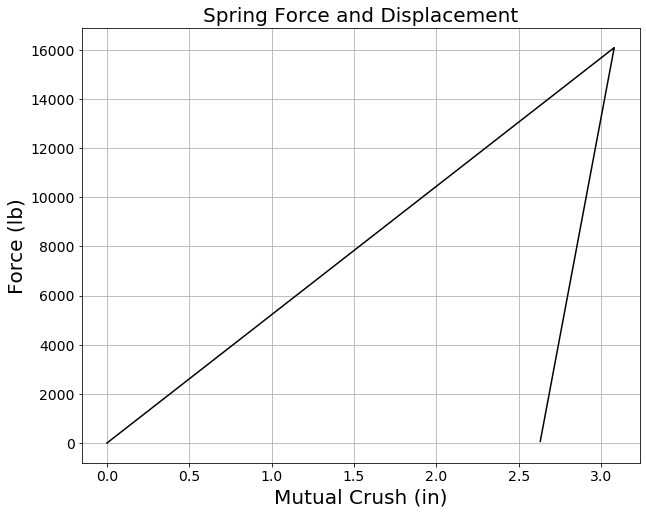

In [24]:
fig = plt.figure(figsize = (10,8))
plt.title('Spring Force and Displacement', fontsize=20)
plt.plot(spring_model.dx * -12, spring_model.springF, label = 'Spring Force', color = 'k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Mutual Crush (in)', fontsize=20)
plt.ylabel('Force (lb)', fontsize=20)
plt.grid(which='both', axis='both')
plt.show()

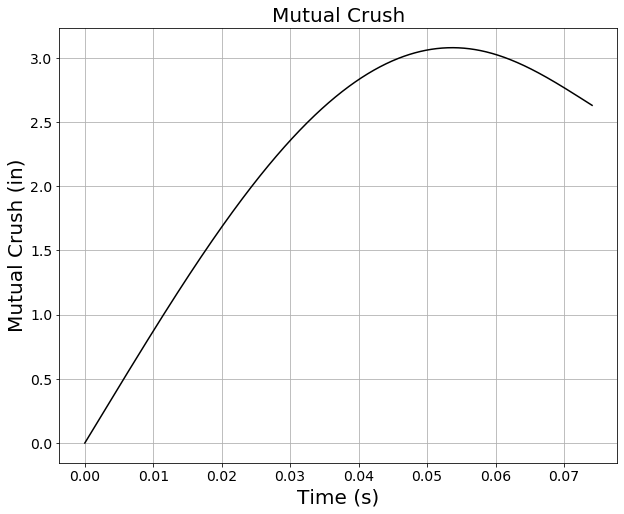

In [26]:
fig = plt.figure(figsize = (10,8))
plt.title('Mutual Crush', fontsize=20)
plt.plot(spring_model.t, spring_model.dx * -12, label = 'Spring Force', color = 'k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Mutual Crush (in)', fontsize=20)
plt.grid(which='both', axis='both')
plt.show()

In [20]:
dxperm * 12

-2.7852422269486117

In [ ]:
 # post run calculations

 # energy
 # dx1, dx2

In [7]:
def BrakeCheck(brake_applied, springF, v):
    if v > 0:                 # vehicle is in motion - full brake force applied
        return brake_applied * -1 * sign(v)

    if brake_applied == 0:    # no brake applied - brake force will be zero
        return 0       
    elif abs(springF) > brake_applied: # spring force is greater than brake force full brake force applied
        return brake_applied * -1 
    elif abs(springF) < brake_applied: # spring force is less than braking force so accel will = 0
            return springF * -1

def sign(x):
    # returns the sign of a number
    if x > 0:
        return 1
    elif x < 0:
        return -1
    elif x == 0:
        return 0
    else:
        return x

# calculate force based on current mutual crush
def SpringForce(dx, closing, keff, kreturn, dxperm):
    if dx >= 0:
        return 0

    if closing == 1:
        return keff * abs(dx) * 12
    if closing == 0:
        return kreturn * abs(dx - dxperm)

def CrushForceAB(A, B, L, C):
    # calculate force from crush using A and B
    # A [lb/in]
    # B [lb/in/in]
    # L [in] - crush length
    # C [in] - crush depth
    return L * (A + B * C)

def ABeffK(A1, B1, L1, A2, B2, L2):
    # calcuate effective stiffness [lb/in] based on A and B values for two vehicles
    # determine displacement at no permanent crush
    
    x1 = [0, 20] # displacement in inches
    y1 = [CrushForceAB(A1, B1, L1, x1[0]), CrushForceAB(A1, B1, L1, x1[1])]
    
    x2 = [0, 20] # displacement in inches
    y2 = [CrushForceAB(A2, B2, L2, x2[0]), CrushForceAB(A2, B2, L2, x2[1])]
    
    dx1 = y1[0] * x1[1] / y1[1]
    dx2 = y2[0] * x2[1] / y2[1]

    # effective stiffness
    keff1 = y1[1] / (x1[1] + dx1)
    keff2 = y2[1] / (x2[1] + dx2)
    keff = (keff1 * keff2) / (keff1 + keff2)
    return keff

def cipriani(ClosingSpeed):
    # calculate restitution based on closing speed in mph
    # based on regression performed by Cipriani
    A = 0.47477
    B = 0.26139 * np.log10(abs(ClosingSpeed) * 0.44704)
    C = 0.03382 * np.log10(abs(ClosingSpeed) * 0.44704)**2
    D = 0.11639 * np.log10(abs(ClosingSpeed) * 0.44704)**3
    return A - B + C - D

####################################  Model Inputs ###########################################
 
# extract inputs from dictionary
W1 = dict_in['W1']
v1_initial = dict_in['v1_initial']
v1_brake = dict_in['v1_brake']

W2 = dict_in['W2']
v2_initial = dict_in['v2_initial']
v2_brake = dict_in['v2_brake']

keff = dict_in['keff']

# initialize data columns 
columns = ['t', 'x1', 'x2', 'v1', 'v2', 'a1', 'a2', 'springF', 'dx', 'v1_brakeF', 'v2_brakeF']
spring_model = pd.DataFrame(columns = columns)

##################################### Model ############################################
# model will produce increasing mutual crush until a common velocity is reached, then mutual crush will decrease
# model will then use COR to determine the slope back to residual crush
# model assumes vehicles are in contact at t = 0, dx = 0
# assumes equal weight distribution on all four tires
cor = cipriani(v1_initial - v2_initial)  # restitution using Cipriani regression
mu_max = 1      # maximum available friction
dt = 0.0001        # time step
dx = 0            # initial mutual crush
i = 0



# main loop will run when vehicles are engaged (spring is compressed)
closing = 1  #  1 if vehicles are closing together, 0 after common velocity is met
kreturn = np.nan  # initial values of nan to ensure loop is working correctly
dxperm = np.nan   # initial values of nan to ensure loop is working correctly
stop = 0

while stop == 0:
    t = i * dt

    if i == 0:

        # initial positions
        x1 = 0
        x2 = 0
        dx = x2 - x1
        # Initial Velocity
        v1 = v1_initial * 1.46667
        v2 = v2_initial * 1.46667

        # Initial Brake Applied - max available braking force
        v1_brakeFApp = v1_brake * W1 * mu_max
        v2_brakeFApp = v2_brake * W2 * mu_max
        
        print(f'Brake Force Applied by V1 = {v1_brakeFApp} lb')
        print(f'Brake Force Applied by V2 = {v2_brakeFApp} lb')
        
        # Initial Brake Force opposing vehicle velocity      
        v1_brakeF = v1_brakeFApp * -1 * sign(v1)   # Initial brake force
        v2_brakeF = v2_brakeFApp * -1 * sign(v2)   # Initial brake force

        # Initial Acceleration - only due to braking
        a1 = v1_brakeF * 32.2 / W1
        a2 = v2_brakeF * 32.2 / W2

        springF = 0  # no initial spring force

        # store initial data in dataframe
        data = [t, x1, x2, v1, v2, a1, a2, springF, dx, v1_brakeF, v2_brakeF]
        spring_model = spring_model.append(pd.Series(data, index = columns), ignore_index=True)


    # this section will calculate forces based on closing or seperating phase
    if i > 0:

        # calculate vehicle motion [ft] based on prior velocity
        x1 = x1 + v1 * dt
        x2 = x2 + v2 * dt
        dx = x2 - x1

        # calculate vehicle velocity [ft/s] based on prior acceleration
        v1 = v1 + a1 * dt
        v2 = v2 + a2 * dt

        dx_past = spring_model.loc[i-1, 'dx']
        # check for closing / seperating status
        if closing == 1:
            if abs(dx_past) > abs(dx):  # if mutual crush decreased at current time step, vehicles are seperating
                print('======   Seperating    =======>')
                print(i)
                print(dx)
                print(dx_past)
                closing = 0
                Fmax = spring_model.loc[i-1, 'springF']
                dxmax = dx_past
                dxperm = dxmax * (1 - cor**2)  # permanent crush
                kreturn = Fmax / abs(dxmax - dxperm)  # return stiffness

        springF = SpringForce(dx, closing, keff, kreturn, dxperm)

        # calculate brake force based on applied braking and spring force
        # v1 brake force will always oppose v1 velocity
        v1_brakeF = v1_brakeFApp * -1 * sign(v1)
        v2_brakeF = BrakeCheck(v2_brakeFApp, springF, v2) # applied brake will oppse velocity if vehicle is in motion

        # calculate vehicle accleration [ft/s/s]
        a1 = 32.2 / W1 * (v1_brakeF - springF)
        a2 = 32.2 / W2 * (v2_brakeF + springF)
        
        if (closing == 0) & (dx > dxperm): # vehicles are seperating and dx is less than permanent crush
            stop = 1
            print(f'Stopping at t = {t}')
            break
                
        # store initial data in dataframe
        data = [t, x1, x2, v1, v2, a1, a2, springF, dx, v1_brakeF, v2_brakeF]
        spring_model = spring_model.append(pd.Series(data, index = columns), ignore_index=True)  

    i += 1

Brake Force Applied by V1 = 0 lb
Brake Force Applied by V2 = 2152.5 lb
======   Seperating    =======>
538
-0.25660439326126444
-0.25660580849819126
Stopping at t = 0.0742
